In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

from VariableLengthPreprocess import WindowsPreprocess
from BinaryClassification.crf_models.CRFModel import CRFModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from division_plot_general import plot_binaries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%%time
tl = WindowsPreprocess()
X, y, paths = tl.preprocess("/Volumes/Tesi/WindowsBuild/extracted_x64", sample_size=10)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(X, y, paths, test_size=0.5, random_state=1)

CPU times: user 4.83 s, sys: 975 ms, total: 5.81 s
Wall time: 8.59 s


In [8]:
crf = CRFModel(
    C=1,
    lookbehind=2,
    lookahead=2,
    verbose=True,
    max_iter=11,
)

In [9]:
%time crf.fit(X_train, y_train)

Iteration 0
dual: 0.530859, dual_gap: 826393.568833, primal: 826394.099693
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
dual: 4.742262, dual_gap: 126210.147215, primal: 126214.889477
Calculating final objective.
CPU times: user 50.6 s, sys: 16.9 s, total: 1min 7s
Wall time: 1min 8s


CRFModel(C=1, lookahead=2, lookbehind=2, max_iter=11, verbose=True)

Logging.bin
BackgroundActivation.bin
LinguisticServices.bin
RelativeInclinometer.bin
UserConsentVerifier.bin
Average accuracy: 99.8656%


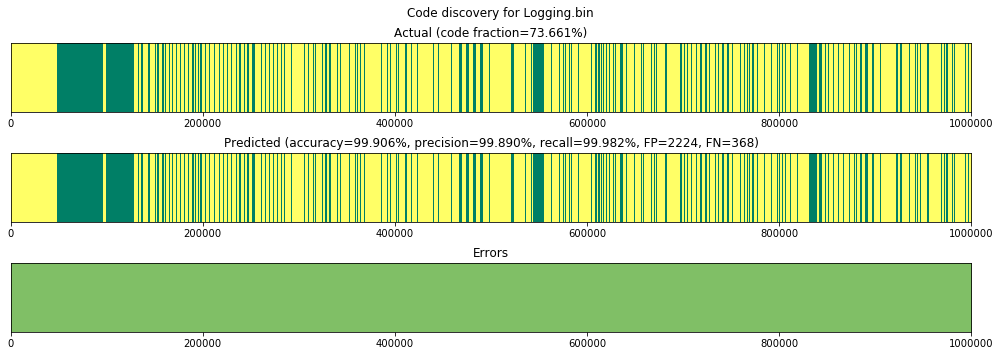

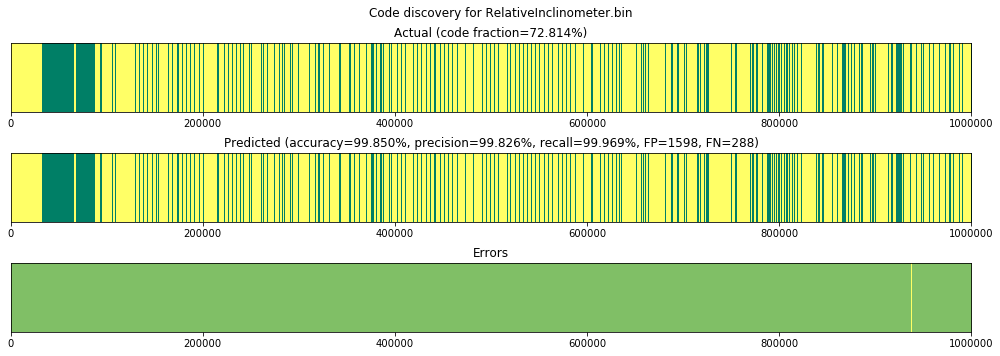

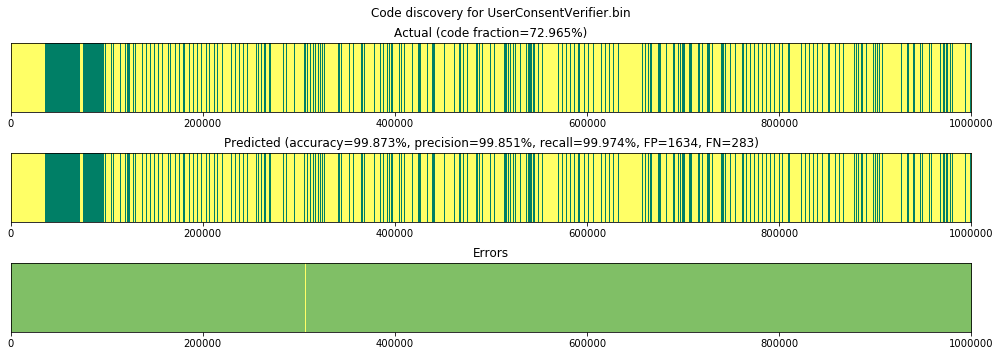

In [10]:
accuracies = []

for x, y, path in list(zip(X_test, y_test, paths_test)):
    acc, fp, fn = plot_binaries(crf, x, y, path, sample_size=1000000)
    accuracies.append(acc)
    
print("Average accuracy: {:.4f}%".format(np.mean(accuracies)*100))